# Decision Tree Practice

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

In [2]:
# Grabbing our data, then exploring it a bit
# Data source: https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv("heart.csv")

# EDA

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
X = df.drop(columns='target')
y = df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,
                                                   random_state=7,
                                                   stratify=y)

In [6]:
y_train.value_counts(normalize=True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [7]:
y_test.value_counts(normalize=True)

1    0.540984
0    0.459016
Name: target, dtype: float64

In [8]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 170 to 11
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [10]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000
mean,54.086777,0.685950,1.016529,131.677686,242.590909,0.173554,0.570248,149.785124,0.338843,1.016116,1.42562,0.780992,2.297521
std,9.217334,0.465098,1.054400,18.005861,47.020191,0.379510,0.528467,23.236724,0.474297,1.153503,0.61503,1.053334,0.633041
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.00000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.00000,0.000000,2.000000
75%,60.750000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,169.000000,1.000000,1.600000,2.00000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,4.000000,3.000000


In [11]:
for column in X_train.columns:
    print(X_train[column].value_counts())

58    18
54    15
57    14
52    11
44    10
59     9
51     9
56     9
43     8
63     8
62     8
60     8
64     7
65     7
53     7
42     7
66     6
45     6
41     6
67     6
61     6
49     5
46     5
47     5
48     4
39     4
55     4
50     3
71     3
38     3
69     3
68     3
40     3
35     3
37     2
34     2
77     1
76     1
70     1
74     1
29     1
Name: age, dtype: int64
1    166
0     76
Name: sex, dtype: int64
0    112
2     76
1     34
3     20
Name: cp, dtype: int64
130    28
120    28
140    25
110    15
150    14
138    11
128    10
112     9
125     8
132     7
160     7
118     7
124     6
108     6
134     5
152     5
100     4
145     3
126     3
170     3
105     3
136     3
180     3
135     3
115     2
94      2
142     2
178     2
146     2
129     1
114     1
102     1
174     1
172     1
165     1
164     1
117     1
156     1
192     1
155     1
148     1
122     1
123     1
144     1
200     1
Name: trestbps, dtype: int64
234    6
204    6
197    5


# Modeling 

## Logistic Regression

### Preprocessing

What kind of preprocessing steps are there?
- Imputing
- Scaling
- Encoding

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

### Logistic Regression Model

In [13]:
X_train.columns.to_list()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [14]:
from sklearn.linear_model import LogisticRegression
# Lets set up a Logistic Regression Pipeline

encoder = OneHotEncoder(drop='first')
catvar = ['restecg', 'slope','ca', 'thal']
catvarid = [X_train.columns.tolist().index(column) for column in catvar]

pipe_lr = make_pipeline(SimpleImputer(),
                       ColumnTransformer([('encoder', encoder, catvarid)],
                                        remainder='passthrough',
                                        sparse_threshold=0),
                       StandardScaler(),
                       LogisticRegression())
pipe_lr.steps

[('simpleimputer',
  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                missing_values=nan, strategy='mean', verbose=0)),
 ('columntransformer',
  ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0,
                    transformer_weights=None,
                    transformers=[('encoder',
                                   OneHotEncoder(categories='auto', drop='first',
                                                 dtype=<class 'numpy.float64'>,
                                                 handle_unknown='error',
                                                 sparse=True),
                                   [6, 10, 11, 12])],
                    verbose=False)),
 ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
               

In [15]:
# Lets fit the LogReg on our training and calculate our roc_auc_scores
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0, transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<cl...
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=Non

In [16]:
train_pred = pipe_lr.predict_proba(X_train)
test_pred = pipe_lr.predict_proba(X_test)

In [17]:
train_pred[0]

array([0.73768601, 0.26231399])

In [18]:
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])

In [19]:
print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")
      

Train ROC-AUC score:0.9495179063360881
Test ROC-AUC score:0.8831168831168832


How'd we do?

## Decision Trees

#### let's do a basic decision tree with just the default values

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Fit the model and lets see the tree

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(1024.7884615384614, 1556.6727272727271, 'X[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(633.1153846153845, 1408.418181818182, 'X[11] <= 0.5\ngini = 0.366\nsamples = 112\nvalue = [85, 27]'),
 Text(364.8461538461538, 1260.1636363636362, 'X[8] <= 0.5\ngini = 0.5\nsamples = 49\nvalue = [24, 25]'),
 Text(171.69230769230768, 1111.909090909091, 'X[12] <= 2.5\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(85.84615384615384, 963.6545454545454, 'X[7] <= 96.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(42.92307692307692, 815.4, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(128.76923076923077, 815.4, 'X[4] <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(85.84615384615384, 667.1454545454545, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(171.69230769230768, 667.1454545454545, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(257.53846153846155, 963.6545454545454, 'X[4] <= 215.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(2

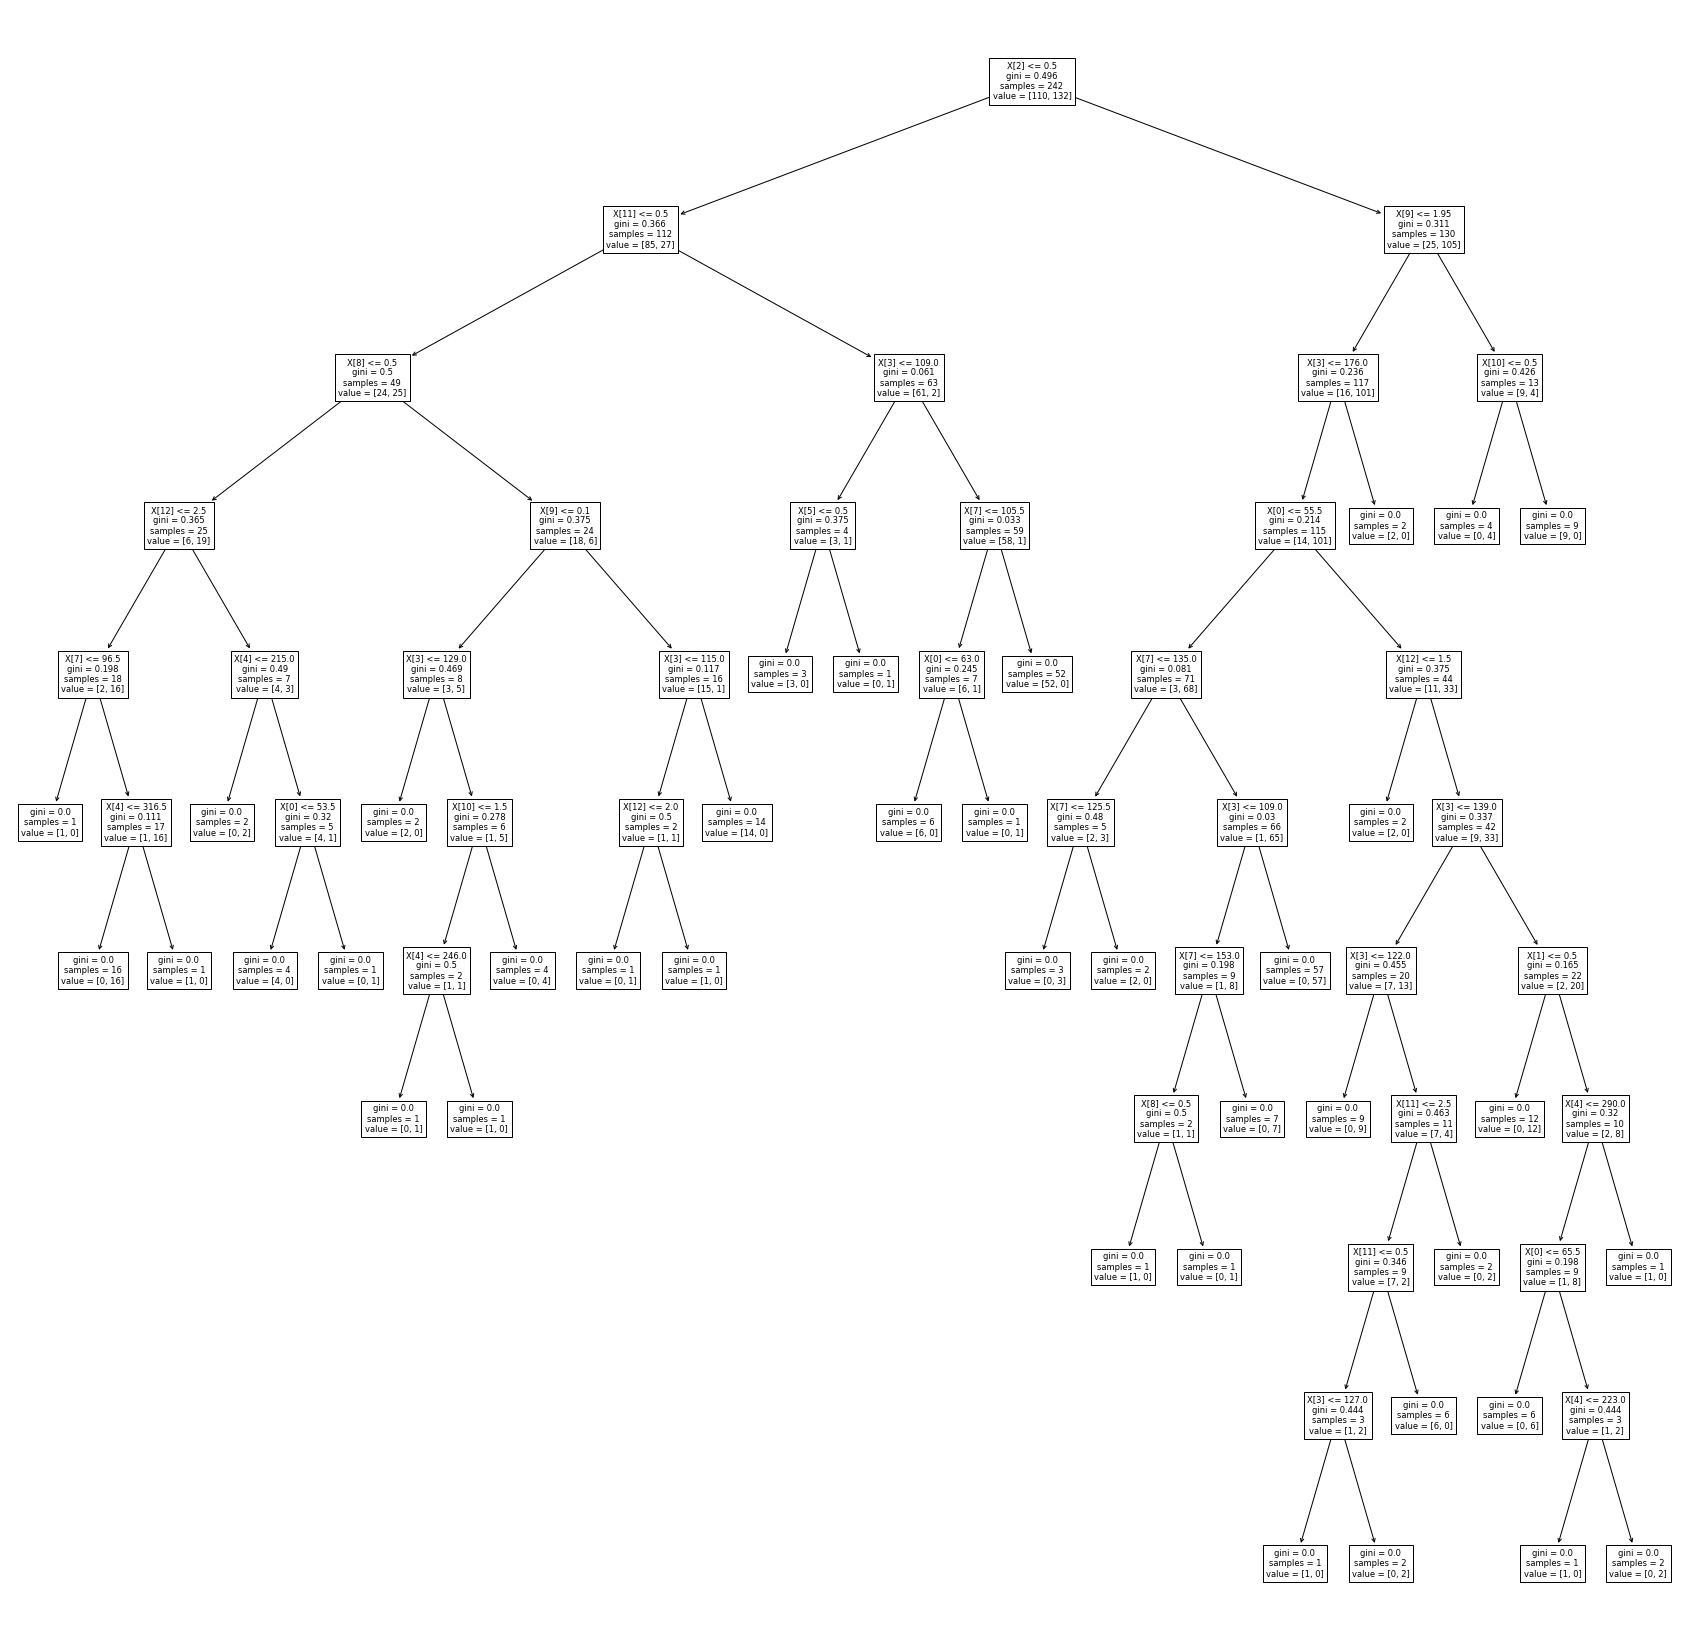

In [21]:
plt.figure(figsize=(30,30))
tree.plot_tree(dt)

In [22]:
dt.get_depth()

10

In [23]:
# Lets calculate the roc_auc_score
train_pred = dt.predict_proba(X_train)
test_pred = dt.predict_proba(X_test)

In [24]:
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])

print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:1.0
Test ROC-AUC score:0.702922077922078


#### A simple decision tree with a single split

In [25]:
# lets set up the Decision Tree with a single split
dt_1 = DecisionTreeClassifier(max_depth=1)


dt_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(139.5, 135.89999999999998, 'gini = 0.366\nsamples = 112\nvalue = [85, 27]'),
 Text(418.5, 135.89999999999998, 'gini = 0.311\nsamples = 130\nvalue = [25, 105]')]

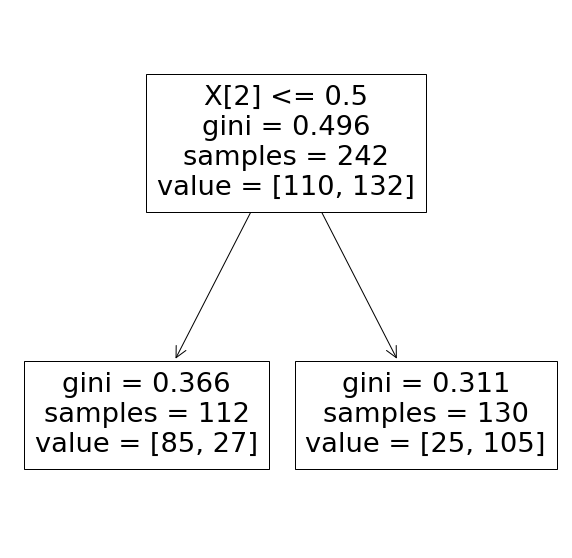

In [26]:
# Visualizing the single-split decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt_1)

In [27]:
# Lets calculate the roc_auc_score
train_pred = dt_1.predict_proba(X_train)
test_pred = dt_1.predict_proba(X_test)

train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])

print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:0.784090909090909
Test ROC-AUC score:0.6574675324675324


#### Try something Random!

In [28]:
# Okay - time to change things!
# Replace None with relevant code
dt_2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', 
                              min_samples_split=10)

dt_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(658.44, 996.6, 'X[2] <= 0.5\nentropy = 0.994\nsamples = 242\nvalue = [110, 132]'),
 Text(401.76, 815.4000000000001, 'X[11] <= 0.5\nentropy = 0.797\nsamples = 112\nvalue = [85, 27]'),
 Text(223.2, 634.2, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 49\nvalue = [24, 25]'),
 Text(89.28, 453.0, 'X[4] <= 215.0\nentropy = 0.795\nsamples = 25\nvalue = [6, 19]'),
 Text(44.64, 271.79999999999995, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(133.92000000000002, 271.79999999999995, 'X[12] <= 2.5\nentropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(89.28, 90.59999999999991, 'entropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(178.56, 90.59999999999991, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(357.12, 453.0, 'X[9] <= 1.55\nentropy = 0.811\nsamples = 24\nvalue = [18, 6]'),
 Text(312.48, 271.79999999999995, 'X[7] <= 162.0\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(267.84000000000003, 90.59999999999991, 'entropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(3

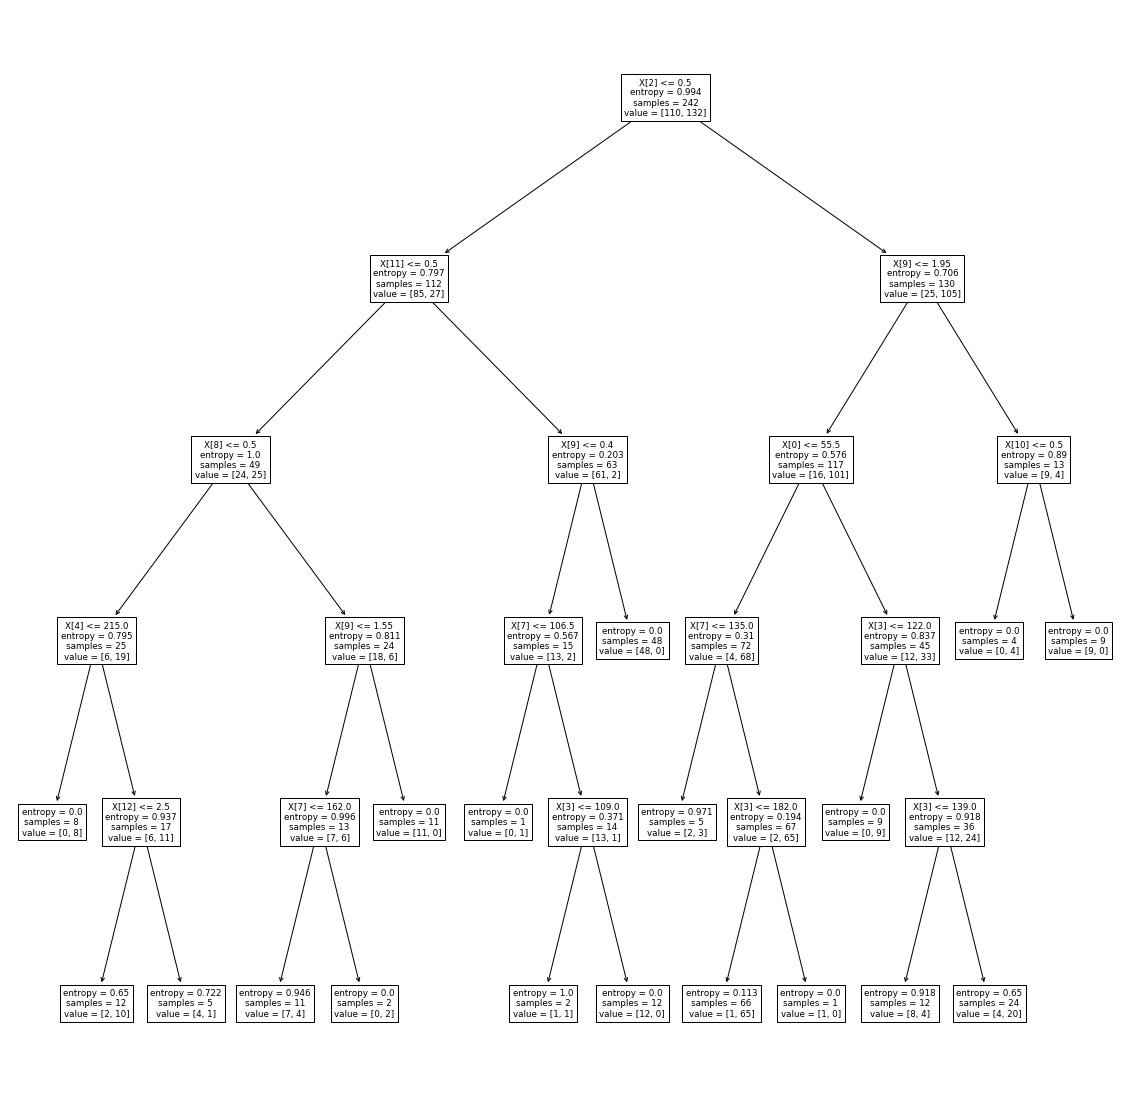

In [29]:
# Visualizing the decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_2)

In [30]:
# Lets calculate the roc_auc_score
train_preds = dt_2.predict_proba(X_train)
test_preds = dt_2.predict_proba(X_test)

train_score = roc_auc_score(y_train, train_preds[:,1])
test_score = roc_auc_score(y_test, test_preds[:,1])

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

Train ROC-AUC: 0.9758264462809917
Test ROC-AUC: 0.737012987012987


## [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Lets start by taking a look at the documentation

In [31]:
grid_params = {
    'max_depth': [3,4,5,6,7],
    'max_features' : ['sqrt','log2'],
    'class_weight' : [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt, grid_params, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                 

In [32]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [33]:
dt_grid = grid_search.best_estimator_
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

[Text(167.4, 190.26, 'X[9] <= 1.7\nentropy = 1.0\nsamples = 242\nvalue = [121.0, 121.0]'),
 Text(83.7, 135.9, 'X[2] <= 0.5\nentropy = 0.956\nsamples = 185\nvalue = [68.2, 112.75]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 181.5\nentropy = 0.905\nsamples = 72\nvalue = [50.6, 23.833]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.874\nsamples = 69\nvalue = [50.6, 21.083]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 3\nvalue = [0.0, 2.75]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 55.5\nentropy = 0.647\nsamples = 113\nvalue = [17.6, 88.917]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.354\nsamples = 71\nvalue = [4.4, 61.417]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.909\nsamples = 42\nvalue = [13.2, 27.5]'),
 Text(251.10000000000002, 135.9, 'X[8] <= 0.5\nentropy = 0.571\nsamples = 57\nvalue = [52.8, 8.25]'),
 Text(209.25, 81.53999999999999, 'X[9] <= 1.85\nentropy = 0.89\nsamples = 23\nvalue = [16.5, 7.333]'),
 Text(188.3250000

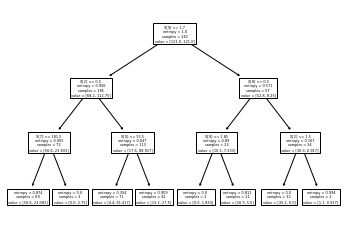

In [34]:
tree.plot_tree(dt_grid)

# Vizualizing all the models scores

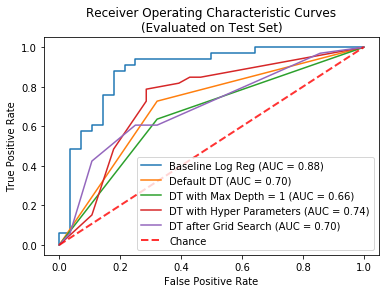

In [35]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(pipe_lr, X_test, y_test, name="Baseline Log Reg", ax=ax)
plot_roc_curve(dt, X_test, y_test, name="Default DT", ax=ax)
plot_roc_curve(dt_1, X_test, y_test, name="DT with Max Depth = 1", ax=ax)
# plot_roc_curve(dt_maxdepth2, X_test, y_test, name="DT with Max Depth = 2", ax=ax)
plot_roc_curve(dt_2, X_test, y_test, name="DT with Hyper Parameters", ax=ax)
plot_roc_curve(dt_grid, X_test, y_test, name="DT after Grid Search", ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
ax.legend()
plt.show()

What can we learn from this visualization? Which is the best model - and how could you tell without looking at the scores?

- Baseline is still best - from both the visualization (closest to the '1' corner) and from the score

